# Рынок заведений общественного питания Москвы

 __Цель исследования:__ выявить текущее положение дел на рынке кафе для обоснования инвестиций в открытие нового кафе. Данное кафе является оригинальным — гостей должны обслуживать роботы. Проект многообещающий, но дорогой.<br> 
<br>
__Данные исследования:__ данные о заведениях общественного питания Москвы с информацией о наименованиях кафе, их типах, адресов, а также количестве посадочным мест.
<br>
На первом этапе мы загрузим данные и подготовим их к анализ, а затем проведем анализ данных с общим выводом и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.

Выполненные задачи в рамках проекта:
- подготовлены данные для анализа;
- проведен анализ по видам заведений (сетевые или несетевые), количестве посадочных мест, а также районах их расположения с помощью построения диаграмм и "ящика с усами";
- описаны основные характеристики для сетевых заведений;
- в рамках анализа был составлен список районов, в которых располагаются топ-10 улиц по количеству объектов общественного питания;
- сформированы выводы с рекомендациями о виде заведения, количестве посадочных мест, а также районе расположения нового места общественного питания.

### Содержание
<ul style="list-style:none; text-decoration: none">
    <li><a style="text-decoration: none" href="#introduction">1. Загрузка данных и подготовка их к анализу</a></li>
    <li><a style="text-decoration: none" href="#data_pre-processing">2. Анализ данных</a></li>
    <li><a style="text-decoration: none" href="#conclusion">3. Выводы</a></li>
</ul>

## 1. Загрузка данных и подготовка их к анализу <a name="introduction"></a> 

In [1]:
#Импортирую библиотеку
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats
from plotly import graph_objects as go

Импортирую библиотеку Pandas и с помощью метода .read_csv() создаю новый DataFrame __rest_data__ 

In [2]:
rest_data = pd.read_csv('rest_data.csv')

Создаю функцию для получения основной информации о датафрейме

In [3]:
#пропишем функцию для получения основной информации о датафрейме
def data_describe(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()
    
#запускаем функцию
data_describe(rest_data) 

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


__Получаем следующую структуру таблицы __``rest_data``__:
 
    * Количество столбцов: __6__
    * Количество строк: __15355__
    * Тип данных в столбцах: __int64(2), object(4)__

Подробно разберём, какие в __``rest_data``__ столбцы и какую информацию они содержат:
* __id__ — id заведения
* __object_name__ — название кафе
* __chain__ — относится ли кафе к сетевым
* __object_type__ — тип заведения
* __address__ — адрес кафе
* __number__ — количество посадочных мест

Проверим на дубликаты таблицу, так как пропусков в таблице нет. Так как данные собирались из разных источников и одно и тоже заведения могло попасть под различным id. При проверке на наличие дубликатов без этого столбца было найдено 82 дубликатов, которые мы успешно удаляем.

In [4]:
rest_data = rest_data.drop(['id'], axis = 1)
print('Найдено дубликатов: {}'.format(rest_data.duplicated().sum()))
print('')
rest_data = rest_data.drop_duplicates().reset_index(drop=True) 

Найдено дубликатов: 82



Приведем к нижнему регистуру для удобства данные с наименованием кафе.

In [5]:
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data.head()

,object_name,chain,object_type,address,number
0,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


__Вывод:__<br>
Полученная таблица содержат в себе информацию о кафе, расположенных в Москве. В рамках работы с полученными таблицами были приведены название данных с кафе к нижнему реестру. В таблице отсутствуют пропущенные значения, но в тоже время найдены 82 дубликата по ячейке __id__, они были удалены.

## 2.  Анализ данных  <a name="data_pre-processing"></a> 

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

Для того, чтобы нам проанализировать объекты общественного питания по количеству, необходимо создать новую таблицу __objectType__, которая позволит нам получить информацию о количестве по каждому типу кафе.
А затем постороим диаграммы

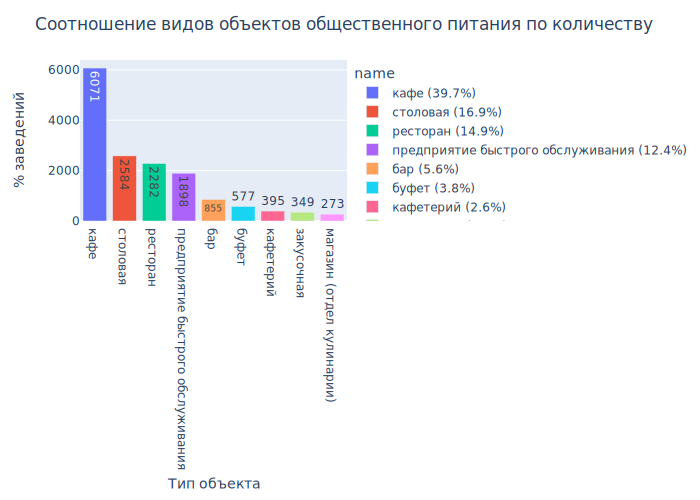

In [6]:
#Создаем новую таблицу objectType где будет информация о типах объекта
objectType = rest_data.groupby('object_type').agg({'object_name': 'count'}).reset_index().sort_values(by='object_name', ascending=False)
objectType.columns=['name', 'count']
objectType['percent'] = (objectType['count'] / objectType['count'].sum()*100).round(1).astype('str')+'%'


#Рисуем график соотношения видов объектов общественного питания по количеству
fig = px.bar(objectType, x ='name', y='count', text='count', color='name')
fig.update_layout(
    title = 'Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="% заведений")
for trace, percent in zip(fig.data, objectType['percent']):
    trace.name = trace.name.split('=')[0] + ' (' + percent+ ')'
fig.show(renderer='svg')

Исходя из полученных данных можно сказать, что наибольшей популярностью пользуются кафе (39,7%), они занимают первое место с большим отрывом. Второе место заняли столовые (16,8%), третье место с небольшим отставанием рестораны (14,9%), а четвертое место предприятия быстрого питания или фастфуды (12,5%). В приниципе можно сказать, что результатам вряд ли можэно удивляться, так как кафе является относительно универсальным понятием. Удивило, что бары заняли только пятое место.  

### Соотношение сетевых и несетевых заведений по количеству. 

Как мы видим из круговой диаграммы - сетевых заведений лишь 20% от общего количества, остальные - несетевые.

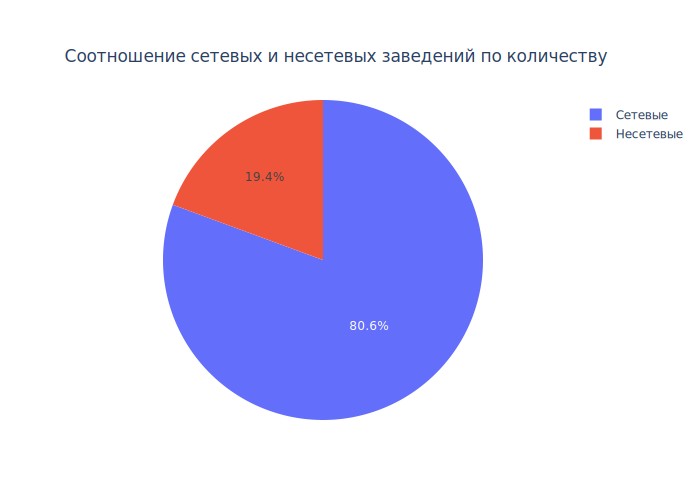

In [7]:
objectChain = rest_data.groupby('chain').agg({'object_name': 'count'}).reset_index()
objectChain.columns=['chain', 'count']

fig = go.Figure(data=[go.Pie(labels=objectChain['chain'], values=objectChain['count'])])
fig.update_layout(
    title={
        'text':'Соотношение сетевых и несетевых заведений по количеству',
        'y':0.9,
        'x':0.48})
for trace in fig.data:
    trace['labels']=['Несетевые', 'Сетевые']
fig.show(renderer='svg') 

### Для какого вида объекта общественного питания характерно сетевое распространение?

Для того, чтобы понять для какого вида объекта общественного питания характерно сетевое распространение создадим новые данные под названием __objectTypeChain__, в котором будет информация по количеству объектов  кафе в разрезе показателя __chain__. Затем рассчитаем соотношение количества сетевых и несетевых заведений по отношению к общему числу количества по типу кафе.

In [8]:
#Создадим новые данные objectTypeChain с количеством объектов кафе по типам в разрезе chain
objectTypeChain = rest_data.groupby(['object_type', 'chain']).agg({'object_name': 'count'}).reset_index()
objectTypeChain.columns=['name', 'chain', 'count_chain']

#Соединяем созданную нами таблицу с objectType
objectTypeMerge= objectTypeChain.merge(objectType, on='name')
#Считаем соотношение количества сетевых и несетевых заведений по отношению к общему числу количества по типу кафе
objectTypeMerge['percent'] = (objectTypeMerge['count_chain'] / objectTypeMerge['count']*100).round(1)
objectTypeMerge = objectTypeMerge.sort_values(by='count_chain', ascending=False)
objectTypeMerge.head()

,name,chain,count_chain,count,percent
7,кафе,нет,4675,6071,77.0
17,столовая,нет,2581,2584,99.9
15,ресторан,нет,1739,2282,76.2
6,кафе,да,1396,6071,23.0
13,предприятие быстрого обслуживания,нет,1110,1898,58.5


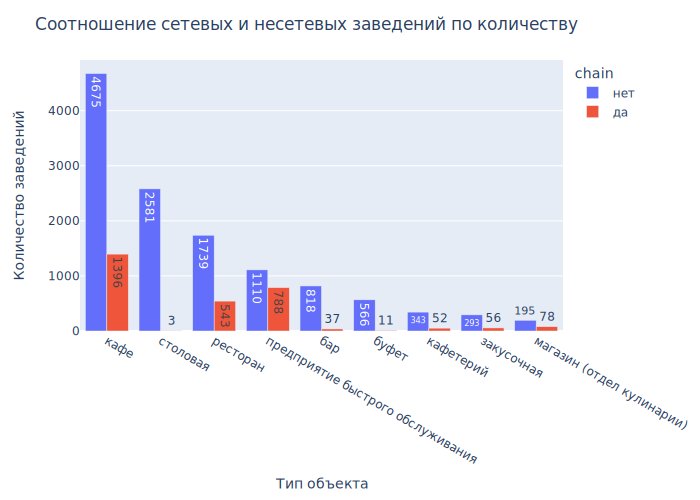

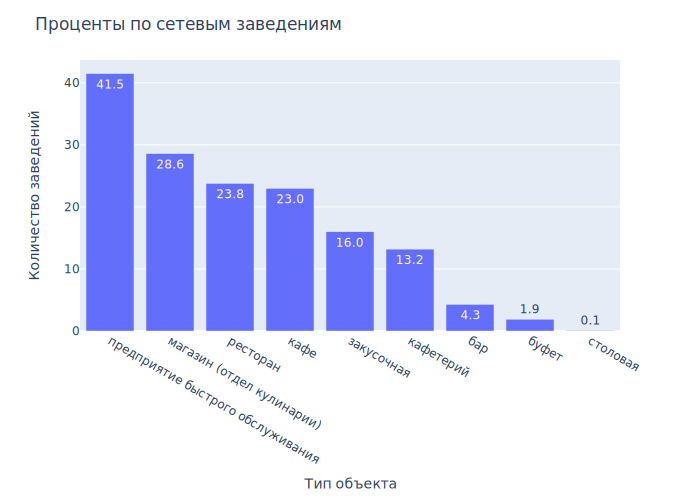

In [9]:
#Построим график по соотношению сетевых и несетевых заведений по количеству
fig = px.bar(objectTypeMerge, x='name', y='count_chain', color='chain', barmode='group', text='count_chain')
fig.update_layout(
    title = 'Соотношение сетевых и несетевых заведений по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество заведений")
for trace in fig.data:
    trace.name = trace.name.split('=')[0]
fig.show(renderer='svg') 

#Построим график по процентному сравнению по сетевым заведениям
objectTypePercent = objectTypeMerge.query('chain == "да"').sort_values(by='percent', ascending=False)
fig = px.bar(objectTypePercent, x='name', y='percent', text='percent')
fig.update_layout(
    title = 'Проценты по сетевым заведениям',
    xaxis_title="Тип объекта",
    yaxis_title="Количество заведений")
fig.show(renderer='svg')

Исходя из полученных выводов можно сделать вывод, что сетевые заведения в основном распространены для предприятий быстрого обслуживания (41% приходится на сетевые магазины). В принципе это неудивительно так как фастфуды в основной массе представляют собой известные сетки. Второе место занимает магазин (отдел кулинария), видимо это связано с тем, что сейчас наиболее крупные игроки FMCG рынок  размещают у себя отдел кулинарии. На третьем месте расположились рестораны. Если рассматривать в количественном выражении, то здесь лидером является кафе, но большая часть из них все таки оносится к несетевым учреждениям.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Для того чтобы понять мало много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест мы вначале сделаем срез по сетевым заведениям и создалим таблицу __restDataChain__. Затем сделаем категоризации по количеству мест - выделим места, где небольшое количество мест (до 25 мест) и большое количество посадочных мест. Затем мы получим информацию по ТОП-10 популярным сетевым местам, которые позволят нам проверить информацию о том какие заведения в наибольшей степени популярны.

In [10]:
#делаем срез по сетевым заведениям
restDataChain = rest_data.query('chain == "да"')

#выделим из них самые популярные сетевые заведения по количеству заведений
objectNameCount = restDataChain.groupby('object_name').agg({'address': 'count', 'number': 'mean'}).reset_index().sort_values(by='address', ascending=False)
objectNameCount = objectNameCount.rename(columns={'address': 'count'})


#Проведем категоризацию по по количеству мест, выделим места, где небольшое количество мест (до 25 мест) и большое количество посадочных мест. 
restDataChain['number_category'] = "до 25 мест"
restDataChain.loc[restDataChain['number'] >= 25, 'number_category'] = 'больше 25 мест'

#получаем информацию по ТОП-10 популярным сетевым местам
objectNameTop10 = objectNameCount.head(10)

objectNameArray = objectNameTop10['object_name'].to_list()

#делаем срез по наиболее популярным местам в разрезе количества мест в заведениях 
for i in objectNameArray:
    objectNameCategory = restDataChain.query('object_name == @objectNameArray')
objectNameCategory = objectNameCategory.groupby(['object_name', 'number_category']).agg({'address': 'count'}).reset_index().sort_values(by='address', ascending=False)
objectNameCategory = objectNameCategory.rename(columns={'address': 'count'})
objectNameCategory.head()

<ipython-input-10-aac5659dbadf>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,object_name,number_category,count
17,шоколадница,больше 25 мест,150
8,макдоналдс,больше 25 мест,130
0,kfc,больше 25 мест,119
2,бургер кинг,больше 25 мест,102
5,домино'с пицца,до 25 мест,75


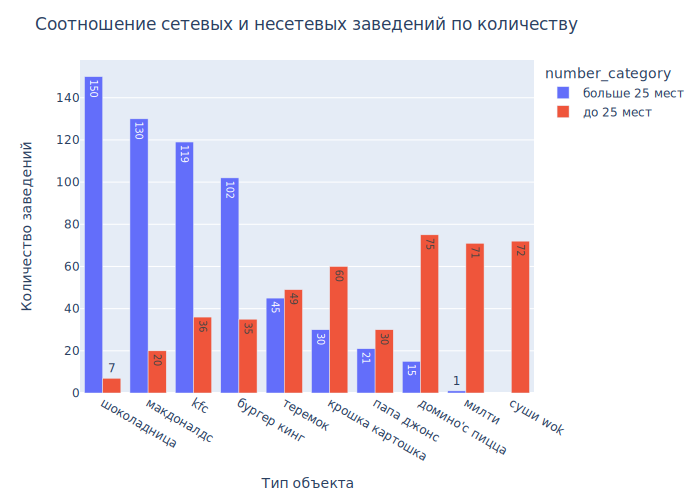

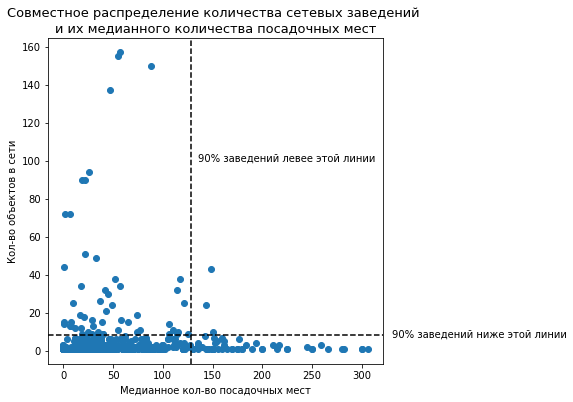

In [11]:
#Построим график по соотношению сетевых и несетевых заведений по количеству
fig = px.bar(objectNameCategory, x='object_name', y='count', color='number_category', barmode='group', text='count')
fig.update_layout(
    title = 'Соотношение сетевых и несетевых заведений по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество заведений")
for trace in fig.data:
    trace.name = trace.name.split('=')[0]
fig.show(renderer='svg')

#Построим график распределения
plt.figure(figsize=(6,6))
plt.scatter(objectNameCount["number"], objectNameCount["count"])
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(objectNameCount['count'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(objectNameCount['number'], 90), linestyle='--', color='black')
plt.text(330,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.show()

Как мы видим из графика, как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест.
В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем. Если смотреть по топ 10 сетевым заведениям, то можно говорить о том, что у 6 заведений преобладающая доля залов вместимостью меньше 25 посадочных мест, Как правило это заведения, которые работают на вынос (СушиВок, Милти, Домино с пиццей) Крупные сетевые игроки, такие как Макдональдс, KFC, Бургер Кинг и Шоколадница, преимущественно залы вместимостью больше чем 25 посадочных мест.


### Cреднее количество посадочных мест по типам заведений

Для того чтобы посчитать среднее количество посадочных мест по типам заведений создадим новую таблицу __objectTypeMean__ с помощью метода __pivot_table()__, данный метод  посчитал среднее количество посадочных мест по типам заведений. Затем построим график.

In [12]:
objectTypeMean = rest_data.pivot_table(index='object_type', values='number', aggfunc='mean').reset_index().sort_values(by='number', ascending=False)
objectTypeMean['number'] = objectTypeMean['number'].astype(int)
objectTypeMean

,object_type,number
8,столовая,130
7,ресторан,96
1,буфет,51
0,бар,43
3,кафе,39
6,предприятие быстрого обслуживания,20
4,кафетерий,9
2,закусочная,7
5,магазин (отдел кулинарии),5


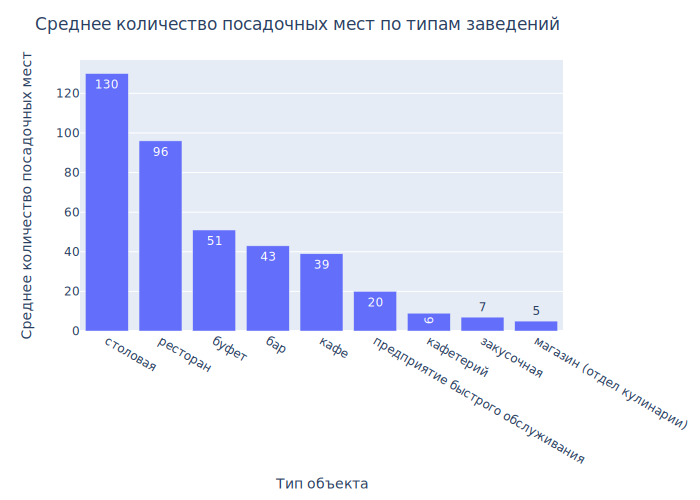

In [13]:
objectTypeMean = rest_data.pivot_table(index='object_type', values='number', aggfunc='mean').reset_index().sort_values(by='number', ascending=False)
objectTypeMean['number'] = objectTypeMean['number'].astype(int)

#Построим график по процентному сравнению по сетевым заведениям
fig = px.bar(objectTypeMean, x='object_type', y='number', text='number')
fig.update_layout(
    title = 'Cреднее количество посадочных мест по типам заведений',
    xaxis_title="Тип объекта",
    yaxis_title="Cреднее количество посадочных мест")
fig.show(renderer='svg')

Наибольшее среднее количество посадочных мест  у столовых - 130, на втором месте расположились рестораны - 96 посадочных мест, а на третьем месте  - буфеты с 51 посадочным местом.

###  Топ-10 улиц по количеству объектов общественного питания. 

Выделим в отдельный столбец информацию об улице из столбца address. Затем создадим новую таблицу с применением метода __groupby()__ c выделением улиц с количеством объектов общественного питания. Затем построим график топ-10 улиц по количеству объектов общественного питания

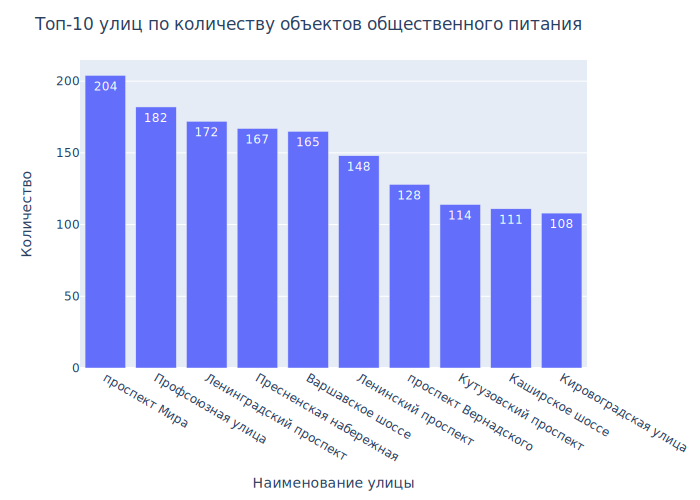

In [14]:
#Выделяем в отдельный столбец информацию об улице из столбца address
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
def street_finder(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type) != -1:
                return address_part
rest_data['street'] = rest_data['address'].apply(street_finder)

#Создаем новую таблицу с применением метода groupby() c выделением улиц с количеством объектов общественного питания
restStreetCount = rest_data.groupby('street').agg({'object_name': 'count'}).reset_index().sort_values(by='object_name', ascending=False)
restStreetCountTop10 = restStreetCount.head(10)

#Строим график топ-10 улиц по количеству объектов общественного питания
fig = px.bar(restStreetCountTop10, x='street', y='object_name', text='object_name')
fig.update_layout(
    title = 'Топ-10 улиц по количеству объектов общественного питания',
    xaxis_title="Наименование улицы",
    yaxis_title="Количество")
fig.show(renderer='svg')

In [15]:
rest_data['address'].str.split(', ', expand=True)

,0,1,2,3,4,5,6
0,город Москва,улица Егора Абакумова,дом 9,None,None,None,None
1,город Москва,улица Талалихина,дом 2/1,корпус 1,None,None,None
2,город Москва,Абельмановская улица,дом 6,None,None,None,None
3,город Москва,Абрамцевская улица,дом 1,None,None,None,None
4,город Москва,Абрамцевская улица,дом 9,корпус 1,None,None,None
...,...,...,...,...,...,...,...
15279,город Москва,3-й Крутицкий переулок,дом 18,None,None,None,None
15280,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15281,город Москва,улица Земляной Вал,дом 33,None,None,None,None
15282,город Москва,поселение Московский,Киевское шоссе,22-й километр,домовладение 4,строение 1,None


<hr style="border: 2px solid orange;" />

Для того, чтобы нам ответить на вопрос — в каких районах Москвы находятся основные улицы воспользуемся внешней информацией с сайта МОСГАЗА.

In [16]:
#встроим сторонний файл с данными в проект
from io import BytesIO
import requests
spreadsheet_id = '1cOiTU8CZtrUmmSepInVybZmovOgWLDOxBjw8nBJ5kNM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
data

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [17]:
#Объединим данные улицы с районами
streetAreaMerge = restStreetCount.merge(data, left_on='street', right_on='streetname')

In [18]:
#Выведем в каких районах находятся топ-10
#for i in restStreetCountTop10['street']:
    #result = streetAreaMerge[streetAreaMerge['street']==i]['area'].to_list()
    #print(i, 'находится в:')
    #for i in result: 
        #print('-', i)
    #print('')

In [19]:
restStreetTop10 = restStreetCountTop10['street'].to_list()


for i in restStreetTop10:
    streetTop10 = streetAreaMerge.query('street== @restStreetTop10')[['street', 'area']]

streetTop10.head(10)

,street,area
0,проспект Мира,Алексеевский район
1,проспект Мира,Ярославский Район
2,проспект Мира,Район Марьина роща
3,проспект Мира,Останкинский район
4,проспект Мира,Район Ростокино
5,проспект Мира,Район Свиблово
6,проспект Мира,Мещанский район
7,Профсоюзная улица,Академический район
8,Профсоюзная улица,Район Черемушки
9,Профсоюзная улица,Район Ясенево


In [20]:
pd.options.display.max_colwidth = -1

<ipython-input-20-f4558aa9ba1e>:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [21]:
streetTop10.groupby('street').agg({'area': set})

,area
street,
Варшавское шоссе,"{Район Нагатино-Садовники, Донской район, Район Южное Бутово, Район Чертаново Южное, Район Чертаново Центральное, Район Северное Бутово, Район Чертаново Северное, Нагорный район}"
Каширское шоссе,"{Район Нагатино-Садовники, Район Москворечье-Сабурово, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное}"
Кировоградская улица,"{Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное}"
Кутузовский проспект,"{Район Фили-Давыдково, Район Дорогомилово}"
Ленинградский проспект,"{Район Беговой, Хорошевский район, Район Сокол, Район Аэропорт}"
Ленинский проспект,"{Ломоносовский район, Обручевский район, Донской район, Район Теплый Стан, Район Гагаринский, Район Тропарево-Никулино, Район Проспект Вернадского, Район Якиманка}"
Пресненская набережная,{Пресненский район}
Профсоюзная улица,"{Обручевский район, Район Коньково, Район Черемушки, Район Ясенево, Район Теплый Стан, Академический район}"
проспект Вернадского,"{Ломоносовский район, Район Раменки, Район Гагаринский, Район Тропарево-Никулино, Район Проспект Вернадского}"


<hr style="border: 2px solid orange;" />

### Анализ числа улиц с одним объектом общественного питания.

Для того чтобы провести анализ числа улиц с одним объектом общественного питания сделаем срез по таким улицам. Затем соединим такие данные с информацией о районах и избавимся от дубликатов. Выведем информацию о районах Москвы, в которых находятся эти улицы.

In [22]:
#делаем срез по улицам с одним объектом общественного питания
restStreetRare = restStreetCount[restStreetCount['object_name']==1]
print('Всего число улиц с одним объектом общественного питания {}'.format(restStreetRare['object_name'].count()))

#соединяем полученные данные с информацией о районах и избавимся от дубликатов.
restStreetMerge = restStreetRare.merge(data[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')
restStreetMerge = restStreetMerge[['area']].drop_duplicates().reset_index(drop=True)

#выводем информацию о пяти первых районах Москвы, в которых находятся эти улицы
restStreetMerge.head()


#result = restStreetMerge['area'].to_list()
#print('Районы, в которых находятся улицы с 1 объектом общественного питания:')
#for i in result: 
    #print('-', i)
#print('')

Всего число улиц с одним объектом общественного питания 551


,area
0,Район Митино
1,Район Печатники
2,Район Филевский Парк
3,Басманный район
4,Район Люблино


### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

В целом для расчета распределения количества посадочных мест для улиц с большим количеством объектов общественного питания у нас все данные готовы. Здесь нужно также избавиться от выбросов. Затем мы строим боксплот.  

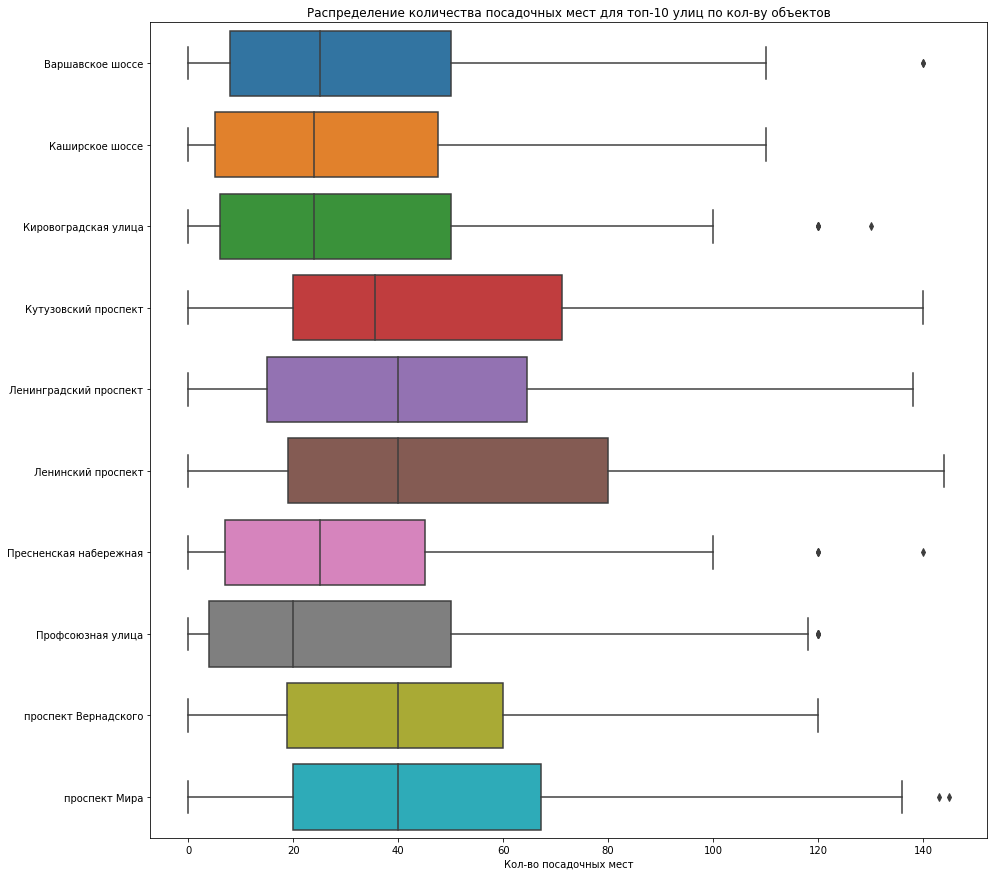

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 30.0


In [23]:
restStreetCountArray = restStreetCountTop10['street'].to_list()

for i in restStreetCountArray:
    boxPlotRest = rest_data.query('street == @restStreetCountArray & number<150')

my_order = boxPlotRest.groupby("street").agg({'number': 'median'}).index

plt.figure(figsize=(15,15))
sns.boxplot(x="number", y="street", data= boxPlotRest, order=my_order)    
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: {}'.format(boxPlotRest['number'].median()))


Таким образом, на Ленинском проспекте находятся самое большое количество кафе с наибольшим количеством посадочных мест. Если говорить о медиане, то для улиц с наиболее большим количеством кафе, где наблюдается больше всего количества мест оно составило 40. На Профсозной улице в основной массе преобладают маленькие кафе, медиана здесь составила 17. Так еще выделяется Кутузовский проспект, на нем тоже большое количество заведений с наибольшим количеством посадочных мест, но медиана составила 37.

In [24]:
street_order = boxPlotRest[boxPlotRest['street'].isin(set(restStreetCountTop10['street']))]\
    .groupby('street', as_index=False)\
    .agg({'number': 'median'})\
    .sort_values(by='number', ascending=False)['street'].to_list()

In [25]:
street_order

['Ленинградский проспект',
 'Ленинский проспект',
 'проспект Вернадского',
 'проспект Мира',
 'Кутузовский проспект',
 'Варшавское шоссе',
 'Пресненская набережная',
 'Каширское шоссе',
 'Кировоградская улица',
 'Профсоюзная улица']

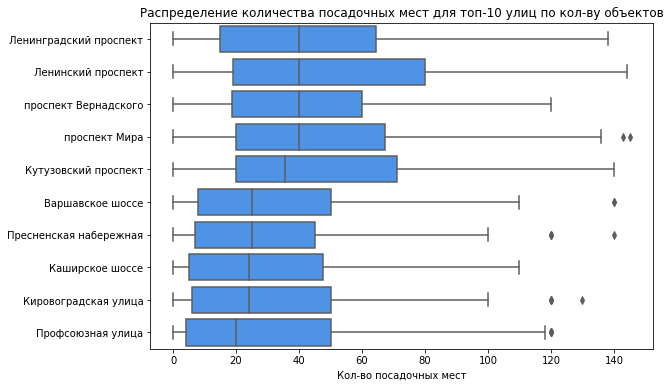

In [26]:
plt.figure(figsize=(9,6))
sns.boxplot(x="number", y="street", data= boxPlotRest, order=street_order, color='#3690FF')    
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

## 5. Выводы <a name="conclusion"></a> 

Исходя из проведенного анализа, можно сделать следующие выводы:
- наибольшее количество типов объектов общественного питания составляют кафе 40%, столовые 17%, рестораны 15%, фастфуды 12,5% и бары 6%; 
- в основной массе анализировались кафе, которые не относятся к сетевым (20% от общего количества);
- Сетевое распространение характерно для предприятий быстрого обслуживания (41% заведений данного типа). В меньше мере оно характерно для магазинов (29% заведений), ресторанов (24% заведений) и кафе (23% заведений).
- Для сетевых заведений характерно - мало заведений с большим количеством посадочных мест. В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем.
- Если смотреть по топ 10 сетевых заведений, то можно говорить о том, что около 6 заведений имеют залы меньше 25 посадочных мест, а 4 имеют больше 25 посадочных мест. Если говорить о топ10 кафе, где посадочных мест меньше 25, то как правило они работают на вынос или на доставку, для них не важно , чтобы люди сидели в кафе. Как например СушиВок.
- у столовых наибольшее количество посадочных мест - в среднем 130, на втором месте оказались рестораны - 96 посадочных мест, а на третьем месте буфеты с 51 посадочным местом.
- самыми популярными районами, где располагаются больше всего кафе являются: проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект,  Каширское шоссе и Кировоградская улица
- в рамках анализа был составлен список районов, в которых располагаются топ-10 улиц по кол-ву объектов общественного питания. Всего улиц с одним объектом общественного питания: 551, что составляет 28.9% от всего кол-ва улиц с объектами общественного питания в Москве. 
- Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 30.